In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense, ReLU, Dropout

pd.options.mode.chained_assignment = None            # Get rid of warning messages
myData = pd.read_csv("heart-2.csv")
myData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
myData = pd.read_csv("heart-2.csv")
myData.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
myData['sex'][myData['sex'] == 0] = 'female'
myData['sex'][myData['sex'] == 1] = 'male'
myData['chest_pain_type'][myData['chest_pain_type'] == 1] = 'typical angina'
myData['chest_pain_type'][myData['chest_pain_type'] == 2] = 'atypical angina'
myData['chest_pain_type'][myData['chest_pain_type'] == 3] = 'non-anginal pain'
myData['chest_pain_type'][myData['chest_pain_type'] == 4] = 'asymptomatic'
myData['fasting_blood_sugar'][myData['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
myData['fasting_blood_sugar'][myData['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'
myData['rest_ecg'][myData['rest_ecg'] == 0] = 'normal'
myData['rest_ecg'][myData['rest_ecg'] == 1] = 'ST-T wave abnormality'
myData['rest_ecg'][myData['rest_ecg'] == 2] = 'left ventricular hypertrophy'
myData['exercise_induced_angina'][myData['exercise_induced_angina'] == 0] = 'no'
myData['exercise_induced_angina'][myData['exercise_induced_angina'] == 1] = 'yes'
myData['st_slope'][myData['st_slope'] == 1] = 'upsloping'
myData['st_slope'][myData['st_slope'] == 2] = 'flat'
myData['st_slope'][myData['st_slope'] == 3] = 'downsloping'
myData['thalassemia'][myData['thalassemia'] == 1] = 'normal'
myData['thalassemia'][myData['thalassemia'] == 2] = 'fixed defect'
myData['thalassemia'][myData['thalassemia'] == 3] = 'reversible defect'

In [4]:
myData.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [4]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    object 
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(6), o

In [5]:
myData.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [6]:
myData.corr()

<ipython-input-6-8971c405f5d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  myData.corr()


,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,0.276326,-0.225439
resting_blood_pressure,0.279351,1.000000,0.123174,-0.046698,0.193216,0.101389,-0.144931
cholesterol,0.213678,0.123174,1.000000,-0.009940,0.053952,0.070511,-0.085239
max_heart_rate_achieved,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.213177,0.421741
st_depression,0.210013,0.193216,0.053952,-0.344187,1.000000,0.222682,-0.430696
num_major_vessels,0.276326,0.101389,0.070511,-0.213177,0.222682,1.000000,-0.391724
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,-0.391724,1.000000


In [14]:
import seaborn as sns
category=[('chest_pain_type', ['typical','nontypical','nonanginal','asymptomatic']),('thalassemia',['fixed','normal','reversable',])]
continuous = [('age', 'Age in year'),
              ('sex','1 for male 0 for female'),
              ('resting_blood_pressure','BP in Rest State'),
              ('resting_blood_pressure','Fasting blood glucose'),
              ('rest_ecg','ECG at rest'),
              ('Chol', 'serum cholestoral in mg/d'),
              ('max_heart_rate_achieved','Max Heart Rate'),
              ('exercise_induced_angina','Exchange Rate'),
              ('st_slope','Slope of Curve'),
              ('st_depression', 'ST depression by exercise relative to rest'), 
              ('num_major_vessels', '# major vessels: (0-3) colored by flourosopy')]

        
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=myData, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=myData, ax=axes[ax_index][1])
    avg = myData[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(myData[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=myData, ax=axes[ax_index][1])
    
    
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(category)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

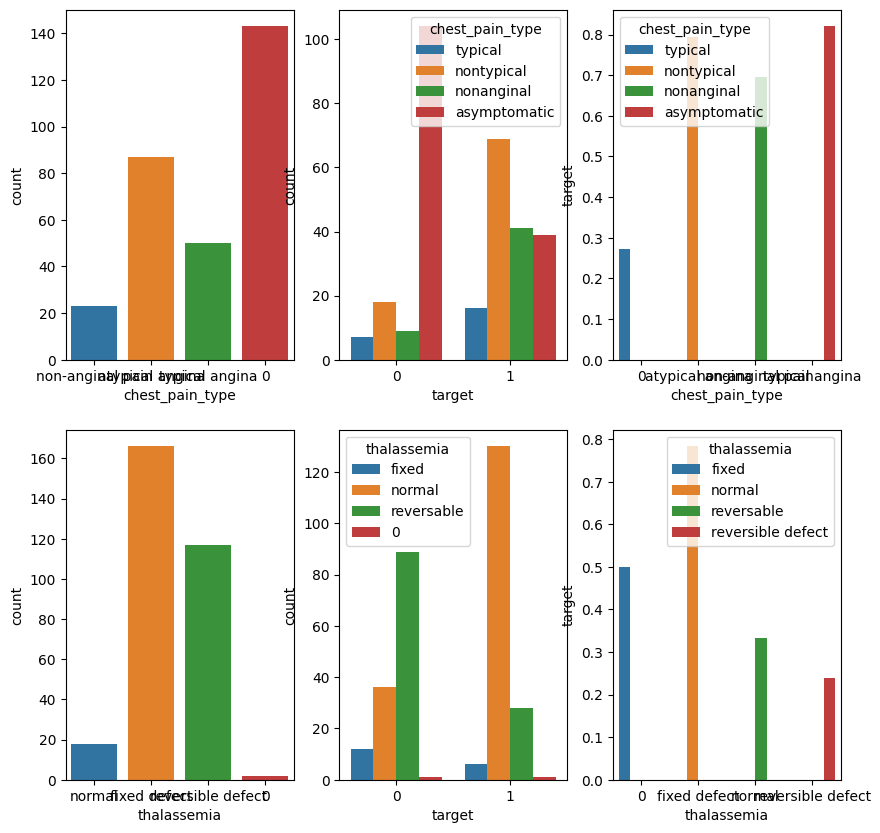

In [8]:
fig_categorial,axes=plt.subplots(nrows=len(category), ncols=3, figsize=(10, 10))
plotGrid(isCategorial=True)

In [16]:
#fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(10,10))
#plotGrid(isCategorial=False)

In [9]:
myData = pd.get_dummies(myData, drop_first=True)

In [10]:
myData = (myData - np.min(myData))/(np.max(myData) - np.min(myData))
x = myData.drop('target', axis=1)
y = myData['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [29]:
lin_model = LogisticRegression(solver='lbfgs')
lin_model.fit(x_train, y_train)
print("Linear Model Accuracy: ", lin_model.score(x_test, y_test))

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
print("K Nearest Neighbor Model Accuracy: ", knn_model.score(x_test, y_test))

svm_model = SVC(gamma='auto')
svm_model.fit(x_train, y_train)
print("Support Vector Machine Model Accuracy: ", svm_model.score(x_test, y_test))

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
print("Naive Bayes Model Accuracy: ", nb_model.score(x_test, y_test))

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
print("Decision Tree Model Accuracy: ", tree_model.score(x_test, y_test))

forest_model = RandomForestClassifier(n_estimators=100)
forest_model.fit(x_train, y_train)
print("Random Forest Model Accuracy: ", forest_model.score(x_test, y_test))

Linear Model Accuracy:  0.8852459016393442
K Nearest Neighbor Model Accuracy:  0.8852459016393442
Support Vector Machine Model Accuracy:  0.8852459016393442
Naive Bayes Model Accuracy:  0.9180327868852459
Decision Tree Model Accuracy:  0.7868852459016393
Random Forest Model Accuracy:  0.9016393442622951


In [12]:
model = Sequential()
model.add(Dense(100, input_shape=(19,)))
model.add(ReLU())
model.add(Dense(100))
model.add(ReLU())
model.add(Dense(10))
model.add(ReLU())
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='Adam', loss='categorical_hinge', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2000      
                                                                 
 re_lu (ReLU)                (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 re_lu_1 (ReLU)              (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 re_lu_2 (ReLU)              (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [13]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
8/8 [==============================] - 2s 5ms/step - loss: 0.9277 - accuracy: 0.6405
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8911 - accuracy: 0.8388
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8416 - accuracy: 0.8388
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7801 - accuracy: 0.8306
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7203 - accuracy: 0.8347
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.8182
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6488 - accuracy: 0.8223
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6335 - accuracy: 0.8264
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6247 - accuracy: 0.8347
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6171 - accuracy: 0.8347
Epoch 11/100
8/8 [===========

In [14]:
y_predicted = (model.predict(x_test) >= 0.5)

conf_mat = confusion_matrix(y_test, y_predicted)
print(conf_mat)
total = sum(sum(conf_mat))
sensitivity = conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0])
specificity = conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1])
accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total

print('specificity : ', specificity)
print('sensitivity : ', sensitivity)
print('accuracy : ', accuracy)

2/2 [==============================] - 0s 6ms/step
[[30  2]
 [ 4 25]]
specificity :  0.9259259259259259
sensitivity :  0.8823529411764706
accuracy :  0.9016393442622951


In [15]:
y_predicted = (model.predict(x_test) > 0.15)

2/2 [==============================] - 0s 4ms/step


In [16]:
conf_mat = confusion_matrix(y_test, y_predicted)
print(conf_mat)
total = sum(sum(conf_mat))
sensitivity = conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0])
specificity = conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1])
accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total

print('specificity : ', specificity)
print('sensitivity : ', sensitivity)
print('accuracy : ', accuracy)

[[29  3]
 [ 3 26]]
specificity :  0.896551724137931
sensitivity :  0.90625
accuracy :  0.9016393442622951


In [17]:
votes = lin_model.predict(x_test) + svm_model.predict(x_test) + nb_model.predict(x_test) \
        + forest_model.predict(x_test) + tree_model.predict(x_test) + knn_model.predict(x_test) \
        + ((model.predict(x_test)>0.5).T)[0].astype(float)

2/2 [==============================] - 0s 5ms/step


In [18]:
conf_mat = confusion_matrix((y_test.values == 1.0),  (votes >= 4))
total = sum(sum(conf_mat))
sensitivity = conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0])
specificity = conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1])
accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total

print("Statistics for voting classifier, where simple majority rules:\n")
print(conf_mat)
print('specificity : ', specificity)
print('sensitivity : ', sensitivity)
print('accuracy : ', accuracy)

Statistics for voting classifier, where simple majority rules:

[[27  5]
 [ 2 27]]
specificity :  0.84375
sensitivity :  0.9310344827586207
accuracy :  0.8852459016393442


In [19]:
conf_mat = confusion_matrix((y_test.values == 1.0),  (votes >= 2))
total = sum(sum(conf_mat))
sensitivity = conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0])
specificity = conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1])
accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total

print("Statistics for voting classifier, where it only takes 2 positive votes (out of 7 votes) to declare "
      "a positive result:\n")
print(conf_mat)
print('specificity : ', specificity)
print('sensitivity : ', sensitivity)
print('accuracy : ', accuracy)

Statistics for voting classifier, where it only takes 2 positive votes (out of 7 votes) to declare a positive result:

[[26  6]
 [ 0 29]]
specificity :  0.8285714285714286
sensitivity :  1.0
accuracy :  0.9016393442622951


In [20]:
model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


array([[9.2053241e-01],
       [5.8878493e-02],
       [9.9992925e-01],
       [9.9999976e-01],
       [2.1281286e-08],
       [1.2435313e-06],
       [1.0000000e+00],
       [1.1470453e-01],
       [3.8126784e-06],
       [9.9999952e-01],
       [1.7242273e-07],
       [9.9999970e-01],
       [4.2380429e-06],
       [7.9586937e-07],
       [1.0000000e+00],
       [9.9999994e-01],
       [2.1357367e-08],
       [9.9999964e-01],
       [9.1147136e-08],
       [6.3266079e-03],
       [1.0000000e+00],
       [6.3925574e-05],
       [4.2162934e-05],
       [3.3690475e-07],
       [4.2707390e-01],
       [9.9999940e-01],
       [1.0000000e+00],
       [1.2720098e-04],
       [7.0765388e-08],
       [9.9999994e-01],
       [9.4367051e-01],
       [1.0000000e+00],
       [9.0814911e-10],
       [1.1601018e-06],
       [9.9985141e-01],
       [1.5295144e-10],
       [9.9999964e-01],
       [4.0923189e-02],
       [1.2945579e-04],
       [3.9888457e-07],
       [1.0000000e+00],
       [9.999970

In [21]:
model.predict(x_test.iloc[[1]])


1/1 [==============================] - 0s 22ms/step


array([[0.0588785]], dtype=float32)

In [22]:
row_dict = {'age': 0.708333,
            'resting_blood_pressure': 0.283019,
            'cholesterol': 0.162100,
            'max_heart_rate_achieved': 0.496183,
            'st_depression': 0.000000,
            'num_major_vessels': 0.000000,
            'sex_male': 0.000000,
            'chest_pain_type_atypical angina': 0.000000,
            'chest_pain_type_non-anginal pain': 0.000000,
            'chest_pain_type_typical angina': 0.000000,
            'fasting_blood_sugar_lower than 120mg/ml': 1.000000,
            'rest_ecg_left ventricular hypertrophy': 0.000000,
            'rest_ecg_normal': 0.000000,
            'exercise_induced_angina_yes': 1.000000,
            'st_slope_flat': 0.000000,
            'st_slope_upsloping': 1.000000,
            'thalassemia_fixed defect': 1.000000,
            'thalassemia_normal': 0.000000,
            'thalassemia_reversible defect': 0.000000}

# create DataFrame from dictionary
df1 = pd.DataFrame(row_dict, index=[1])


In [23]:
df1


,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversible defect
1,0.708333,0.283019,0.1621,0.496183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [36]:
print("ye")
print(model.predict(df1))

ye
1/1 [==============================] - 0s 20ms/step
[[0.05887829]]


In [35]:
if model.predict(df1) > 0.5:
  print("yes")
else:
  print("no")

1/1 [==============================] - 0s 21ms/step
no


In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

def predict_heart_disease():
    age = float(input("Enter age: "))
    sex = int(input("Enter sex (0 for female, 1 for male): "))
    chest_pain_type = int(input("Enter chest pain type (1 for typical angina, 2 for atypical angina, 3 for non-anginal pain, 4 for asymptomatic): "))
    resting_blood_pressure = float(input("Enter resting blood pressure: "))
    cholesterol = float(input("Enter cholesterol: "))
    fasting_blood_sugar = int(input("Enter fasting blood sugar (0 for lower than 120mg/ml, 1 for greater than 120mg/ml): "))
    rest_ecg = int(input("Enter resting electrocardiographic results (0 for normal, 1 for ST-T wave abnormality, 2 for left ventricular hypertrophy): "))
    max_heart_rate_achieved = float(input("Enter maximum heart rate achieved: "))
    exercise_induced_angina = int(input("Enter exercise induced angina (0 for no, 1 for yes): "))
    st_depression = float(input("Enter ST depression induced by exercise relative to rest: "))
    st_slope = int(input("Enter the slope of the peak exercise ST segment (1 for upsloping, 2 for flat, 3 for downsloping): "))
    num_major_vessels = int(input("Enter number of major vessels colored by fluoroscopy (0-3): "))
    thalassemia = int(input("Enter thalassemia (1 for normal, 2 for fixed defect, 3 for reversible defect): "))
    
    input_data = {'age': age, 'sex': sex, 'chest_pain_type': chest_pain_type, 'resting_blood_pressure': resting_blood_pressure, 'cholesterol': cholesterol, 'fasting_blood_sugar': fasting_blood_sugar, 'rest_ecg': rest_ecg, 'max_heart_rate_achieved': max_heart_rate_achieved, 'exercise_induced_angina': exercise_induced_angina, 'st_depression': st_depression, 'st_slope': st_slope, 'num_major_vessels': num_major_vessels, 'thalassemia': thalassemia}
    input_df = pd.DataFrame(input_data, index=[0])
    input_df = pd.get_dummies(input_df, drop_first=True)
    # match columns with training data
    input_df = input_df.reindex(columns=x_train.columns, fill_value=0)
    
    lin_model = LogisticRegression(solver='lbfgs')
    lin_model.fit(x_train, y_train)
    
    return lin_model.predict(input_df)[0]
    
accuracy = predict_heart_disease()
print("Accuracy:", accuracy)

Enter age: 57
Enter sex (0 for female, 1 for male): 1
Enter chest pain type (1 for typical angina, 2 for atypical angina, 3 for non-anginal pain, 4 for asymptomatic): 1
Enter resting blood pressure: 140
Enter cholesterol: 250
Enter fasting blood sugar (0 for lower than 120mg/ml, 1 for greater than 120mg/ml): 1
Enter resting electrocardiographic results (0 for normal, 1 for ST-T wave abnormality, 2 for left ventricular hypertrophy): 1
Enter maximum heart rate achieved: 150
Enter exercise induced angina (0 for no, 1 for yes): 1
Enter ST depression induced by exercise relative to rest: 2.3
Enter the slope of the peak exercise ST segment (1 for upsloping, 2 for flat, 3 for downsloping): 2
Enter number of major vessels colored by fluoroscopy (0-3): 1
Enter thalassemia (1 for normal, 2 for fixed defect, 3 for reversible defect): 1
Accuracy: 0.0


In [99]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))